# Dog breed identification

Here we train a deep learning algorythm to identify the breed of a dog from a photography. We use different methods : VGG16 from scratch, VGG16 transfered and EfficientNetB7 transfered.

As such CNN constitute state of the art methods in image recognition it is an interesting choice of programs. We remind here that CNNs are hegemonic in this domain, over other machine learning technique, thanks to their specific architecture allowing them to reduce parameters number through convolutional layers and therefore schrinking computation time and avoiding overfitting.     

Training was done with a google collab GPU (40gb vram)

The original data is the Stanford Dogs dataset (http://vision.stanford.edu/aditya86/ImageNetDogs/)

This is a variant of training made to examine the impact of using lion algorithm.

In [ ]:
!pip install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.7/528.7 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 115.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.0/441.0 kB 45.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from keras import metrics
from IPython.display import SVG
import pydot
import graphviz
from keras import backend as K
from tensorflow.keras import layers
from tensorflow import keras
from imgaug import augmenters as iaa
import imgaug as ia
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import time
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#data_dir = r"C:\Users\alexh\Projet_6/Images10"
data_dir = "drive/MyDrive/Images"

results = pd.DataFrame(columns=['MODEL', 'BATCH_SIZE',"OPTIMIZER","LOSS_FUNCTION","EPOCHS","TRAIN_TIME","VAL_ACCURACY"])
results

,MODEL,BATCH_SIZE,OPTIMIZER,LOSS_FUNCTION,EPOCHS,TRAIN_TIME,VAL_ACCURACY


In [ ]:
def plot_model_metric(model,title):

    acc = model.history['accuracy']
    val_acc = model.history['val_accuracy']

    loss = model.history['loss']
    val_loss = model.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title(title)

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.ylabel('Cross Entropy loss')
    plt.xlabel('epoch')
    plt.show()


def train_model(model,
                train_data,
                validation_data,
                ModelCheckpointStr,
                MODEL_NAME,
                EPOCHS,
                OPTIMIZER_NAME,
                LOSS_FUNCTION):

  #Callbacks
  es = EarlyStopping(monitor='val_accuracy',
                   mode='max',
                   verbose=1,
                   min_delta=0.01,
                   patience=10)


  mc = ModelCheckpoint(ModelCheckpointStr,
                     monitor='val_accuracy',
                     mode='max',
                     verbose=1,
                     save_best_only=True)

  start_time = time.time()
  history = model.fit(train_data,
                      epochs=EPOCHS,
                      validation_data=validation_data,
                      callbacks=[es, mc])

  train_time = time.time()-start_time
  val_acc_max = max(history.history['val_accuracy'])


  new_row = pd.Series({'MODEL':MODEL_NAME,
                      'BATCH_SIZE':BATCH_SIZE,
                      "OPTIMIZER":OPTIMIZER_NAME,
                      "LOSS_FUNCTION":LOSS_FUNCTION,
                      'EPOCHS':EPOCHS,
                      'TRAIN_TIME':train_time,
                      'VAL_ACCURACY': val_acc_max})

  global results
  results = pd.concat([results, new_row.to_frame().T], ignore_index=True)

  plot_model_metric(history,MODEL_NAME)

  results

  return model,history

def unfreeze_model(model):
    # We unfreeze layers while leaving BatchNorm layers frozen
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True



EfficientNetB7 transfered without fine tunning, 10 classes, AdamW

Found 1919 files belonging to 10 classes.
Using 1536 files for training.
Using 383 files for validation.
Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 2.3502 - accuracy: 0.2695
Epoch 1: val_accuracy improved from -inf to 0.65535, saving model to adam10.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 58s 1s/step - loss: 2.3502 - accuracy: 0.2695 - val_loss: 2.0094 - val_accuracy: 0.6554
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 1.2611 - accuracy: 0.6243
Epoch 2: val_accuracy improved from 0.65535 to 0.93734, saving model to adam10.h5
24/24 [==============================] - 30s 1s/step - loss: 1.2611 - accuracy: 0.6243 - val_loss: 1.7188 - val_accuracy: 0.9373
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 0.8080 - accuracy: 0.7780
Epoch 3: val_accuracy improved from 0.93734 to 0.96084, saving model to adam10.h5
24/24 [==============================] - 30s 1s/step - loss: 0.8080 - accuracy: 0.7780 - val_loss: 1.4726 - val_accuracy: 0.9608
Epoch 4/10
24/24 [==============================] - ETA: 0s - loss: 0.6034 - accuracy: 0.8294
Epoch 4: val_accuracy improved from 0.96084 to 0.96867, saving model to adam10.h5
24/24 [==============================] - 30s 1s/step - loss: 0.6034 - accuracy: 0.829

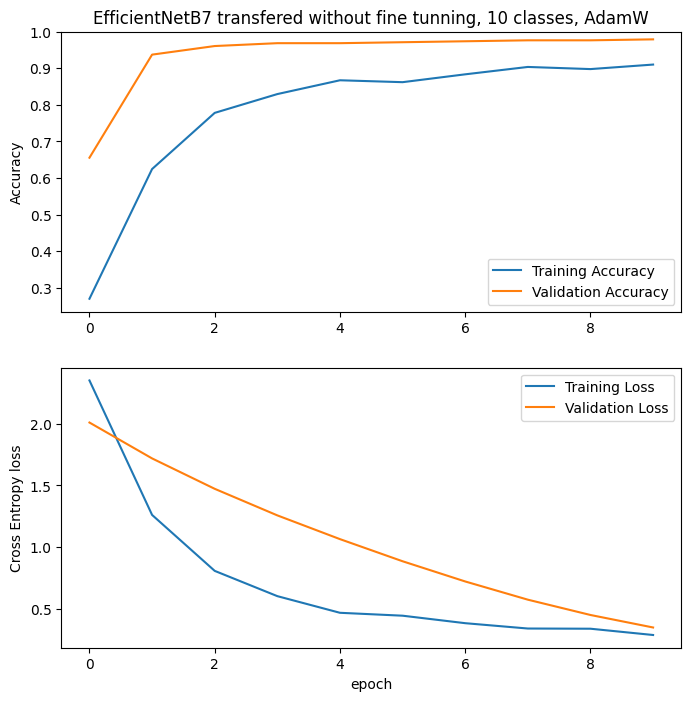

In [ ]:
from keras.applications import EfficientNetB7
BATCH_SIZE = 64
IMG_HEIGHT = 600
IMG_WIDTH = 600

NUM_CLASSES = 10

size = (IMG_HEIGHT, IMG_WIDTH)

data_dir = "drive/MyDrive/Images10"

ds_train_b7,ds_test_b7 = tf.keras.utils.image_dataset_from_directory(
                                                              data_dir,
                                                              validation_split=0.2,
                                                              subset="both",
                                                              label_mode = "int",
                                                              seed=42,
                                                              crop_to_aspect_ratio = False,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)



img_augmentation = keras.Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)



def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    x = img_augmentation(inputs)
    model = tf.keras.applications.efficientnet.EfficientNetB7(include_top=False,
                                                              input_tensor=x,
                                                              weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer,
         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False)
         ,metrics=["accuracy"]
    )
    return model



model = build_model(num_classes=NUM_CLASSES)



model1,hystory1 = train_model(model = model,
            train_data = ds_train_b7,
            validation_data = ds_test_b7,
            ModelCheckpointStr = 'adam10.h5',
            MODEL_NAME = "EfficientNetB7 transfered without fine tunning, 10 classes, AdamW",
            EPOCHS = 10,
            OPTIMIZER_NAME = "Adam",
            LOSS_FUNCTION = "SparseCategoricalCrossentropy")

#33.3 GB

EfficientNetB7 transfered without fine tunning, 10 classes, Lion

Found 1919 files belonging to 10 classes.
Using 1536 files for training.
Using 383 files for validation.
258076736/258076736 [==============================] - 13s 0us/step
Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 2.3465 - accuracy: 0.2799
Epoch 1: val_accuracy improved from -inf to 0.73368, saving model to lion10.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 143s 3s/step - loss: 2.3465 - accuracy: 0.2799 - val_loss: 1.9326 - val_accuracy: 0.7337
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 1.0160 - accuracy: 0.6999
Epoch 2: val_accuracy improved from 0.73368 to 0.94778, saving model to lion10.h5
24/24 [==============================] - 30s 1s/step - loss: 1.0160 - accuracy: 0.6999 - val_loss: 1.4768 - val_accuracy: 0.9478
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 0.4560 - accuracy: 0.8646
Epoch 3: val_accuracy improved from 0.94778 to 0.97911, saving model to lion10.h5
24/24 [==============================] - 29s 1s/step - loss: 0.4560 - accuracy: 0.8646 - val_loss: 1.0036 - val_accuracy: 0.9791
Epoch 4/10
24/24 [==============================] - ETA: 0s - loss: 0.3240 - accuracy: 0.8952
Epoch 4: val_accuracy did not improve from 0.97911
24/24 [==============================] - 28s 1s/step - loss: 0.3240 - accuracy: 0.8952 - val_loss: 0.5941 - val_acc

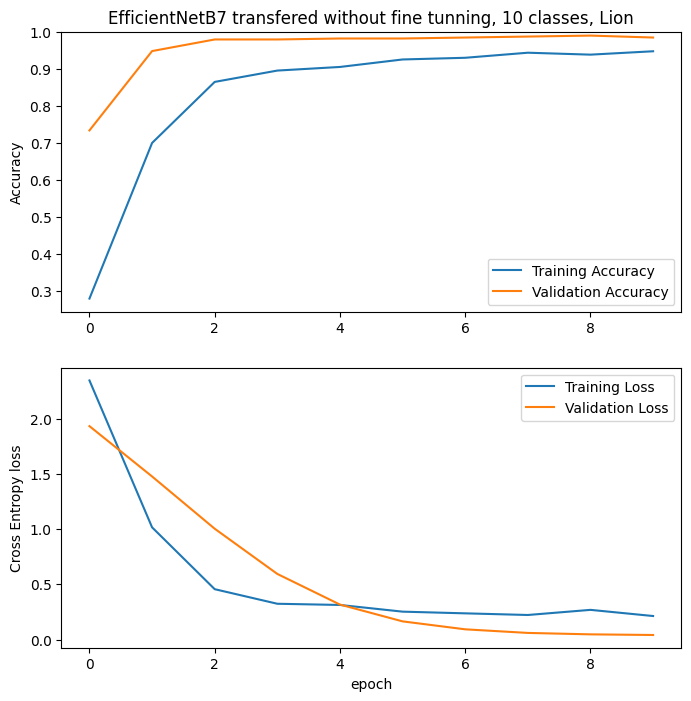

In [ ]:
from keras.applications import EfficientNetB7
BATCH_SIZE = 64
IMG_HEIGHT = 600
IMG_WIDTH = 600

NUM_CLASSES = 10

size = (IMG_HEIGHT, IMG_WIDTH)

data_dir = "drive/MyDrive/Images10"

ds_train_b7,ds_test_b7 = tf.keras.utils.image_dataset_from_directory(
                                                              data_dir,
                                                              validation_split=0.2,
                                                              subset="both",
                                                              label_mode = "int",
                                                              seed=42,
                                                              crop_to_aspect_ratio = False,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)



img_augmentation = keras.Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)



def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    x = img_augmentation(inputs)
    model = tf.keras.applications.efficientnet.EfficientNetB7(include_top=False,
                                                              input_tensor=x,
                                                              weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Lion(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer,
         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False)
         ,metrics=["accuracy"]
    )
    return model



model = build_model(num_classes=NUM_CLASSES)



model2,history2 = train_model(model = model,
            train_data = ds_train_b7,
            validation_data = ds_test_b7,
            ModelCheckpointStr = 'lion10.h5',
            MODEL_NAME = "EfficientNetB7 transfered without fine tunning, 10 classes, Lion",
            EPOCHS = 10,
            OPTIMIZER_NAME = "Lion",
            LOSS_FUNCTION = "SparseCategoricalCrossentropy")

33.3BG

EfficientNetB7 transfered without fine tunning, 120 classes, AdamW

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.
Epoch 1/10
258/258 [==============================] - ETA: 0s - loss: 2.7150 - accuracy: 0.4342
Epoch 1: val_accuracy improved from -inf to 0.92444, saving model to adam120.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


258/258 [==============================] - 1442s 5s/step - loss: 2.7150 - accuracy: 0.4342 - val_loss: 1.7679 - val_accuracy: 0.9244
Epoch 2/10
258/258 [==============================] - ETA: 0s - loss: 0.9975 - accuracy: 0.7467
Epoch 2: val_accuracy improved from 0.92444 to 0.94849, saving model to adam120.h5
258/258 [==============================] - 297s 1s/step - loss: 0.9975 - accuracy: 0.7467 - val_loss: 0.2551 - val_accuracy: 0.9485
Epoch 3/10
258/258 [==============================] - ETA: 0s - loss: 0.7940 - accuracy: 0.7811
Epoch 3: val_accuracy improved from 0.94849 to 0.95360, saving model to adam120.h5
258/258 [==============================] - 297s 1s/step - loss: 0.7940 - accuracy: 0.7811 - val_loss: 0.1706 - val_accuracy: 0.9536
Epoch 4/10
258/258 [==============================] - ETA: 0s - loss: 0.7015 - accuracy: 0.8002
Epoch 4: val_accuracy improved from 0.95360 to 0.95651, saving model to adam120.h5
258/258 [==============================] - 297s 1s/step - loss: 0.

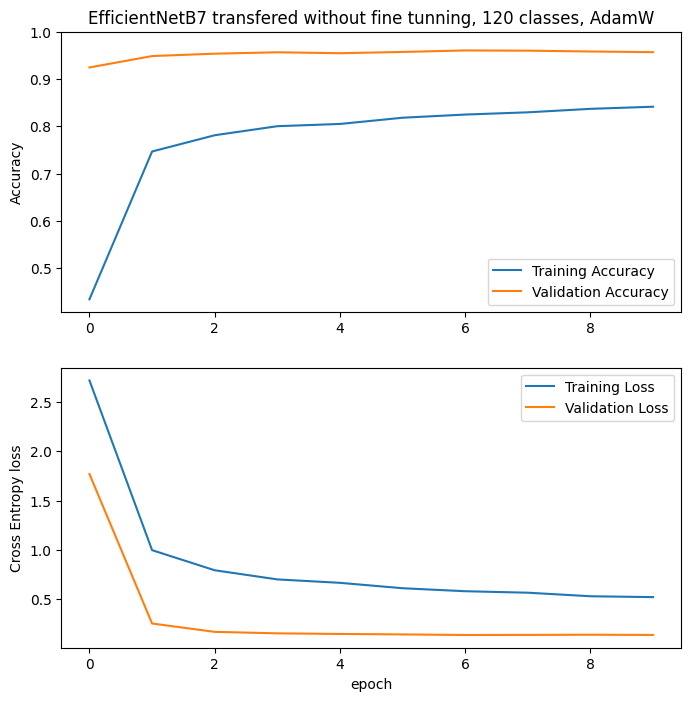

In [ ]:
from keras.applications import EfficientNetB7
BATCH_SIZE = 64
IMG_HEIGHT = 600
IMG_WIDTH = 600

NUM_CLASSES = 120

size = (IMG_HEIGHT, IMG_WIDTH)

data_dir = "drive/MyDrive/Images"

ds_train_b7 = tf.keras.utils.image_dataset_from_directory(
                                                              data_dir,
                                                              validation_split=0.2,
                                                              subset="training",
                                                              label_mode = "int",
                                                              seed=42,
                                                              crop_to_aspect_ratio = False,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)


ds_test_b7 = tf.keras.utils.image_dataset_from_directory(
                                                              data_dir,
                                                              validation_split=0.2,
                                                              subset="validation",
                                                              label_mode = "int",
                                                              seed=42,
                                                              crop_to_aspect_ratio = False,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)

img_augmentation = keras.Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)



def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    x = img_augmentation(inputs)
    model = tf.keras.applications.efficientnet.EfficientNetB7(include_top=False,
                                                              input_tensor=x,
                                                              weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer,
         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False)
         ,metrics=["accuracy"]
    )
    return model



model = build_model(num_classes=NUM_CLASSES)



model3,history3 = train_model(model = model,
            train_data = ds_train_b7,
            validation_data = ds_test_b7,
            ModelCheckpointStr = 'adam120.h5',
            MODEL_NAME = "EfficientNetB7 transfered without fine tunning, 120 classes, AdamW",
            EPOCHS = 10,
            OPTIMIZER_NAME = "Adam",
            LOSS_FUNCTION = "SparseCategoricalCrossentropy")




EfficientNetB7 transfered without fine tunning, 120 classes, Lion

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.
Epoch 1/10
258/258 [==============================] - ETA: 0s - loss: 1.6728 - accuracy: 0.6265
Epoch 1: val_accuracy improved from -inf to 0.95432, saving model to lion120.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


258/258 [==============================] - 325s 1s/step - loss: 1.6728 - accuracy: 0.6265 - val_loss: 0.1664 - val_accuracy: 0.9543
Epoch 2/10
258/258 [==============================] - ETA: 0s - loss: 0.8022 - accuracy: 0.8187
Epoch 2: val_accuracy did not improve from 0.95432
258/258 [==============================] - 295s 1s/step - loss: 0.8022 - accuracy: 0.8187 - val_loss: 0.1907 - val_accuracy: 0.9507
Epoch 3/10
258/258 [==============================] - ETA: 0s - loss: 0.7185 - accuracy: 0.8302
Epoch 3: val_accuracy did not improve from 0.95432
258/258 [==============================] - 295s 1s/step - loss: 0.7185 - accuracy: 0.8302 - val_loss: 0.2010 - val_accuracy: 0.9495
Epoch 4/10
258/258 [==============================] - ETA: 0s - loss: 0.6740 - accuracy: 0.8388
Epoch 4: val_accuracy did not improve from 0.95432
258/258 [==============================] - 295s 1s/step - loss: 0.6740 - accuracy: 0.8388 - val_loss: 0.2023 - val_accuracy: 0.9507
Epoch 5/10
258/258 [===========

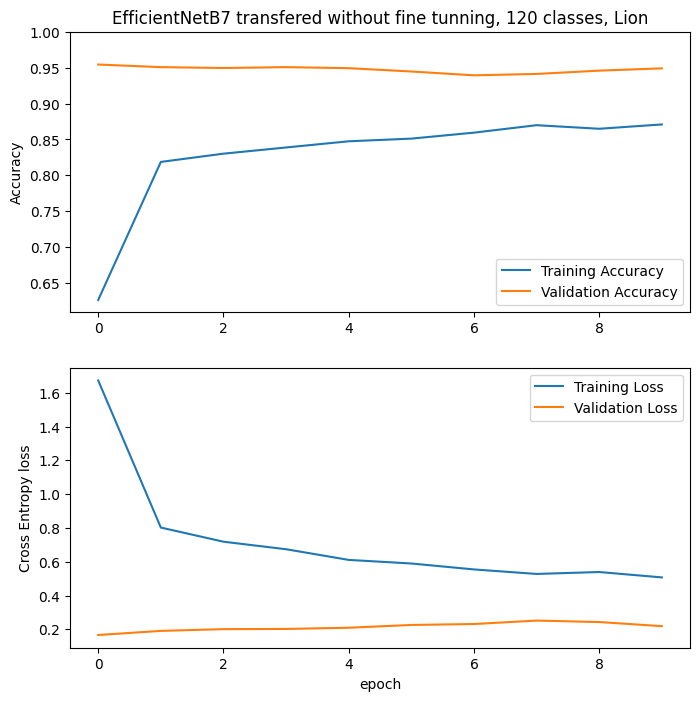

In [ ]:

from keras.applications import EfficientNetB7
BATCH_SIZE = 64
IMG_HEIGHT = 600
IMG_WIDTH = 600

NUM_CLASSES = 120

size = (IMG_HEIGHT, IMG_WIDTH)

data_dir = "drive/MyDrive/Images"

ds_train_b7 = tf.keras.utils.image_dataset_from_directory(
                                                              data_dir,
                                                              validation_split=0.2,
                                                              subset="training",
                                                              label_mode = "int",
                                                              seed=42,
                                                              crop_to_aspect_ratio = False,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)


ds_test_b7 = tf.keras.utils.image_dataset_from_directory(
                                                              data_dir,
                                                              validation_split=0.2,
                                                              subset="validation",
                                                              label_mode = "int",
                                                              seed=42,
                                                              crop_to_aspect_ratio = False,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)

img_augmentation = keras.Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)



def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    x = img_augmentation(inputs)
    model = tf.keras.applications.efficientnet.EfficientNetB7(include_top=False,
                                                              input_tensor=x,
                                                              weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Lion(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer,
         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False)
         ,metrics=["accuracy"]
    )
    return model



model = build_model(num_classes=NUM_CLASSES)



model4,history4 = train_model(model = model,
            train_data = ds_train_b7,
            validation_data = ds_test_b7,
            ModelCheckpointStr = 'lion120.h5',
            MODEL_NAME = "EfficientNetB7 transfered without fine tunning, 120 classes, Lion",
            EPOCHS = 10,
            OPTIMIZER_NAME = "Lion",
            LOSS_FUNCTION = "SparseCategoricalCrossentropy")

In [ ]:
results

NameError: ignored